In [184]:
# For my final project I will be analysing the fatal police shooting dataset. I would like to visualize
# individuals who are shot based off of race, signs of mental illness, age, and gender.
# I predict that there is a correlation between whether the officers cam was on and the race, threat level, 
# gender, and signs of mental illness of the individual who was killed. 

In [185]:
# importing packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [186]:
# reading in csv file into a data frame
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [187]:
# showing data frame information
df.info()
# as you can see this data frame describes the individual, where the shooting took place, and data realting
# to their incident with the officers. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [188]:
# Here I am cleaning the data set by
# dropping the city column to only look at state issues and renaming data set in case dropped columns are needed.
df_edited = df.drop(['city'], axis=1)
df_edited

,id,name,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,IL,False,attack,Not fleeing,False


In [189]:
# for visualization I want to see the proportions of age, race, gender, and mental illness signs compared
# to police shootings

Text(0, 0.5, 'Proportion')

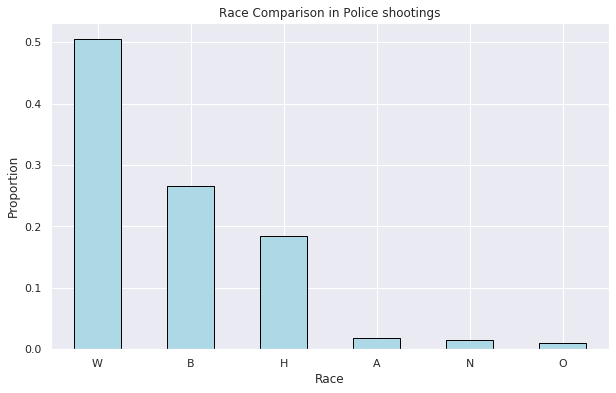

In [190]:
# showing race proportions to deaths
# creating a temp data frame that drops rows where the value is NaN or null
temp_df = df_edited['race'].value_counts(dropna = True, normalize = True).to_frame()
plt.figure(figsize=(10,6))
ax = temp_df['race'].plot(kind = 'bar', rot = 0, color = 'lightblue', edgecolor = 'black')
ax.set_title('Race Comparison in Police shootings')
ax.set_xlabel('Race')
ax.set_ylabel('Proportion')

Text(0, 0.5, 'Proportion')

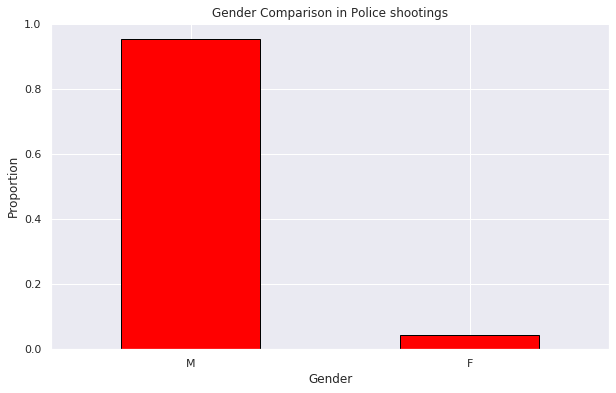

In [191]:
# showing proportions between male and female in police shootings
# creating a temp data frame that drops rows where the value is NaN or null
temp_df = df_edited['gender'].value_counts(dropna = True, normalize = True).to_frame()
plt.figure(figsize=(10,6))
ax = temp_df['gender'].plot(kind = 'bar', rot = 0, color = 'red', edgecolor = 'black')
ax.set_title('Gender Comparison in Police shootings')
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')

Text(0, 0.5, 'Proportion')

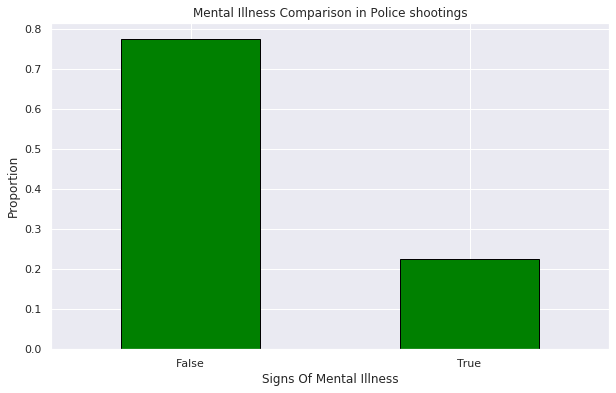

In [192]:
# showing proportions of mental illness signs in police shootings
# creating a temp data frame that drops rows where the value is NaN or null
temp_df = df_edited['signs_of_mental_illness'].value_counts(dropna = True, normalize = True).to_frame()
plt.figure(figsize=(10,6))
ax = temp_df['signs_of_mental_illness'].plot(kind = 'bar', rot = 0, color = 'green', edgecolor = 'black')
ax.set_title('Mental Illness Comparison in Police shootings')
ax.set_xlabel('Signs Of Mental Illness')
ax.set_ylabel('Proportion')

In [193]:
# for age I will be creating a new column that groups the age by 10s to show proportions in age groups
# in police shootings. The new data frame is shown here.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['Child', 'Teen', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df_edited['age_grouping'] = pd.cut(df_edited['age'], bins=bins, labels=labels, right=False)
df_edited

,id,name,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,age_grouping
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False,50s
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False,40s
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False,20s
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False,30s
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,MO,False,other,Other,False,20s
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,CA,False,attack,Not fleeing,False,NaN
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,KS,False,attack,Car,False,30s
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,IL,False,attack,Not fleeing,False,20s


Text(0, 0.5, 'Proportion')

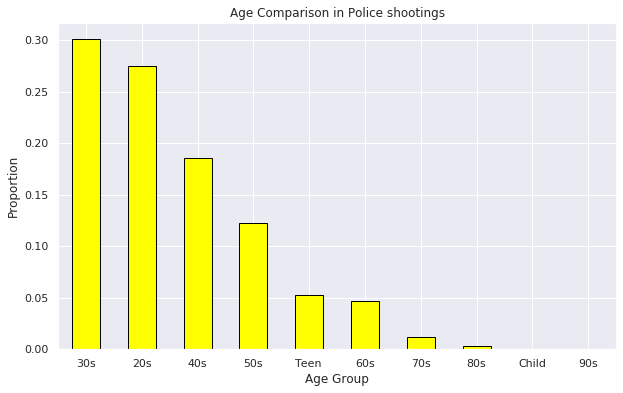

In [194]:
# now showing the proportions of the age groups and deaths in the data set.
# creating a temp data frame that drops rows where the value is NaN or null
temp_df = df_edited['age_grouping'].value_counts(dropna = True, normalize = True).to_frame()
plt.figure(figsize=(10,6))
ax = temp_df['age_grouping'].plot(kind = 'bar', rot = 0, color = 'yellow', edgecolor = 'black')
ax.set_title('Age Comparison in Police shootings')
ax.set_xlabel('Age Group')
ax.set_ylabel('Proportion')

In [195]:
# here we are going to see predict whether the body cam footage being on for the columns race, mental illness, 
# gender, and threat level. This is to see the accruacy of whether the body cam was on.
# imports from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [206]:
# here we take our data frame and set it to the correct columns we want to look at.
# remove nan values from data frame.
# for this machine learning technique I followed along with the youtube video: 
# https://www.youtube.com/watch?v=irHhDMbw3xo by Data School to understand the implementations and reasons
# behind the code.

# dropping rows with any null values in specified columns
df.dropna(subset = ['gender', 'race', 'signs_of_mental_illness', 'threat_level', 'body_camera'], inplace = True)

# creating new data frame to use with our X and Y 
df_model = df.drop(['id', 'name', 'date', 'manner_of_death', 'armed','city', 'age', 'state', 'flee'], axis = 1)
X = df_model.drop('body_camera', axis = 'columns')
Y = df_model.body_camera

In [207]:
# the column_trans uses a oneHotEncoder to change the data from categorial (Male, Female), etc of each row
# and make it a numeric 1 or 0 in a numpy array to then determine the categories in each column
column_trans = make_column_transformer(
    (OneHotEncoder(), ['gender', 'race', 'signs_of_mental_illness', 'threat_level']))
# this code simply creates a logistic regression instance.
logreg = LogisticRegression()

In [208]:
# this creates a pipeline for our onehotencoded data and our logistic regression.
pipe = make_pipeline(column_trans, logreg)

In [209]:
# this piece of code is for cross validating by splitting the data 5 ways. Then it fits the data on 4 folds
# and scores the 5th one. This helps to understand adding new data and how accurate it will be. In our case, 
# adding data to the race, gender, threat_level, and signs_of_mental_illness data provides the below number
# for how accurate the data will be for the body_camera data. Then we show the mean of all 5 folds.
cross_val_score(pipe, X, Y, cv=5, scoring='accuracy').mean()

0.8818963050230716

In [210]:
# CONCLUSION 

In [211]:
# Now that all of my visualizations are done I am going to discuss what this data means to me.
# From looking at the Race visualization and dropping all null values in that column the data shows that half
# of the individuals killed were white with black and hispanic individuals following with strong percentages.
# But according to https://www.census.gov/quickfacts/fact/table/US/PST045219 the U.S. percentage of americans
# shows that 60 percent of the U.S. is white, 13% of the U.S. is black, and 18% of the U.S. is hispanic or latino.
# Now this does explain the wide difference in the statistics here because police are more likely to encounter
# a white individual. 

In [212]:
# In terms of Male and Female statistics we can see that a majority of men are killed in this dataset. According
# to https://www.statista.com/statistics/585149/people-shot-to-death-by-us-police-by-gender/ this visualization
# is confirmed.

In [213]:
# For the signs of mental illness I really just wanted to see the statistics from the data set. It's interesting
# how in the media you can see that people are not typically depicted as mentally ill but it would be nice
# to have some more research on the idea behind police incidents and the mentally ill.

In [214]:
# The last visualization I wanted to depict was based on age. I grouped the ages and from the data you can see
# that about half of the shootings happened with 20-30 year olds. Which makes sense due to how many people
# of that age group are driving to and from work all of the time so they have more opportunites to run into
# police.

In [215]:
# Lastly, for my machine learning model I chose to use a cross validation method to test race,
# signs of mental illness, threat level, and gender to test the prediction of new data added to those columns
# and the prediction of whether a police officer has a body cam on and active during the incident. From my 
# findings there is an ~88% accuracy outcome of adding new data to those columns and the accuracy of our
# body cam data being correct. This is interesting because using those columns, which I believed to be the 
# biggest factors in whether the police officer had their cam on, really does have an accurate depiction of
# the accuracy when new data is added. 